# KNN on Ionosphere data

We will implement the k-neighbors classifier using the 
[Ionosphere dataset](https://archive.ics.uci.edu/ml/datasets/ionosphere).

First, we will examine the data to see what are we dealing with:

In [1]:
# Importing libraries needed for this exercise
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data pre-processing

In [2]:
datafile="ionosphere.data"
dataframe = pd.read_csv(datafile, header=None)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

As we can see this dataset is comprised of 34 different variables: 2 of int64 type and 32 of float64 type. Fortunately, it does not have any missing values. Also, the last column is the one that has the labels. We will get more insights.

In [4]:
dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that we are dealing with continuous variables in most of the cases (except for the firt two variables). Also, the second variable, with label '1', does not have any variance, so we can omit it.

At the same time, it seems that there is no need for normalization since all variable are already in the same scale.

The labels are not considered in this table, but pandas can provide us with a frequency table for that specific column:

In [5]:
dataframe[34].value_counts()

g    225
b    126
Name: 34, dtype: int64

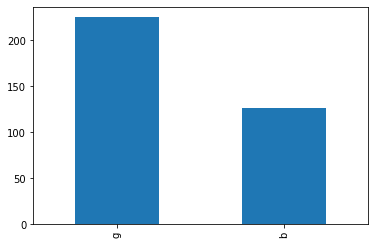

In [6]:
dataframe[34].value_counts().plot.bar()

It can be observed that the ratio of `g` to `b` is not 1. In fact, we have more g's than b's. There are 225 `g` and 126 `b`. This is important to consider, specially when splitting the dataset.

We can also create a frequency table for the first two columns to see their distribution

In [7]:
dataframe[0].value_counts()

1    313
0     38
Name: 0, dtype: int64

In [8]:
dataframe[1].value_counts()

0    351
Name: 1, dtype: int64

After seeing the distribution of the first two columns, we can decide to drop the second column due to its lack of variance. All values are the same. As for the first column, we can keep it.

In [9]:
dataframe.drop(columns=[1], inplace=True)
dataframe

,0,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


Another thing we should do is to change the labels into class numbers, we can also rename the labels column:

In [10]:
dataframe.rename(columns={34: 'labels'}, inplace=True)
dataframe['labels'] = dataframe.labels.astype('category')
mapping = {'g': 1, 'b': 0}
dataframe.labels.replace(mapping, inplace=True)
dataframe

,0,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,labels
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


### Data Splitting

Now, we get the data ready to split. Our X is composed of 33 variables.

In [11]:
X = dataframe.values[:, :-1]
y = dataframe.values[:, -1]

In [12]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)

### Normalization

It's true that we already inspected the data, but it is a common practice to normalize so:

In [13]:
scaler = StandardScaler()
# We don't need to normalize the data for the first column since it is just 1's and 0's
x_train[:, 1:] = scaler.fit_transform(x_train[:, 1:])
x_val[:, 1:] = scaler.transform(x_val[:, 1:])

In [14]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(280, 33) (280,)
(71, 33) (71,)


We can also visualize the data to see if we find any interesting pattern. A way to do this is to reduce the dimensions of the data while preserving the relative distance of the vectors.

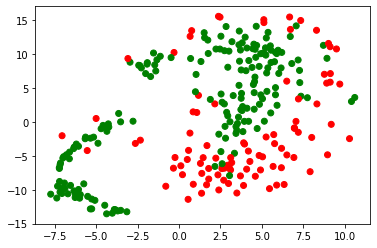

In [15]:
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(x_train)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_train])
plt.show()

It seems like our KNN algorithm could do a good job with these data. We can also apply Principal Components Analysis (PCA):

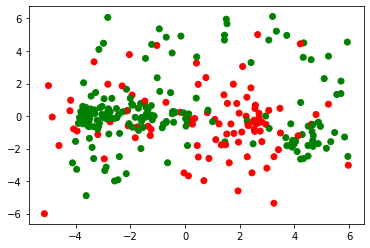

In [16]:
from sklearn.decomposition import PCA

x_embedded = PCA(n_components=2).fit_transform(x_train)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_train])
plt.show()

The same graphs can be obtained for the validation set:

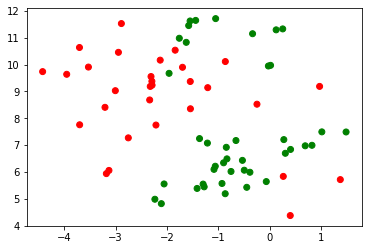

In [17]:
x_embedded = TSNE(n_components=2).fit_transform(x_val)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_val])
plt.show()

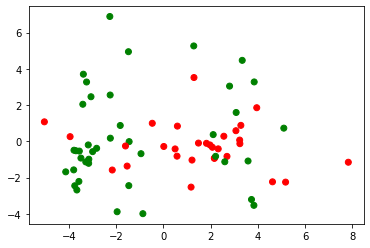

In [18]:
from sklearn.decomposition import PCA

x_embedded = PCA(n_components=2).fit_transform(x_val)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_val])
plt.show()

### KNN

We are going to train the k-nearest neighbor model on the training set and run the model on
the validation set. It is important to remember that the labels 1 and 0 represent `g` and `b` respectively. 

Additionally, we can plot the Receiver Operating Charecteristic Curve (ROC). It is a plot of the false positive vs the true posistive rate for different thresholds values between 0.0 and 1.0.

In [19]:
def KNN(number_neighbors, distance_type, weights_type):
    distance_types = ['Manhattan', 'Euclidean', 'Minkowski']
    print(distance_types[distance_type-1] + ' distance and ' + str(number_neighbors) + 
          ' neighbors and '+ str(weights_type) + ' weight' + "\n")
            
    knn = KNeighborsClassifier(n_neighbors=number_neighbors, p=distance_type, weights=weights_type)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_val)
    
    ## Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, predictions))
    
    plot_confusion_matrix(knn, x_val, y_val)
    plt.show()
    
    print("\nClassification Report:")
    print(classification_report(y_val, predictions))

Manhattan distance and 5 neighbors and uniform weight

Confusion Matrix:
[[25  5]
 [ 1 40]]


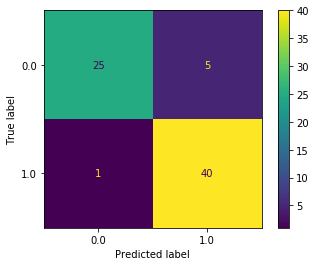


Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89        30
         1.0       0.89      0.98      0.93        41

    accuracy                           0.92        71
   macro avg       0.93      0.90      0.91        71
weighted avg       0.92      0.92      0.91        71



In [20]:
KNN(5, 1, 'uniform')

Minkowski distance and 5 neighbors and uniform weight

Confusion Matrix:
[[17 13]
 [ 1 40]]


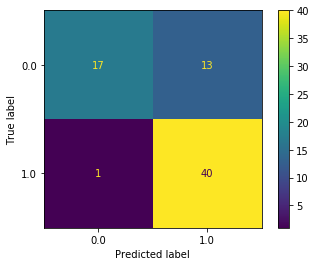


Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71        30
         1.0       0.75      0.98      0.85        41

    accuracy                           0.80        71
   macro avg       0.85      0.77      0.78        71
weighted avg       0.83      0.80      0.79        71



In [21]:
KNN(5, 3, 'uniform')

Manhattan distance and 5 neighbors and distance weight

Confusion Matrix:
[[25  5]
 [ 0 41]]


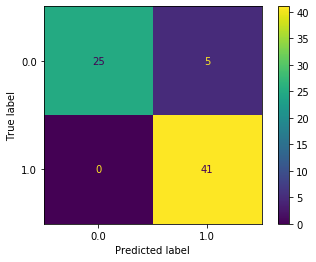


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        30
         1.0       0.89      1.00      0.94        41

    accuracy                           0.93        71
   macro avg       0.95      0.92      0.93        71
weighted avg       0.94      0.93      0.93        71



In [22]:
KNN(5, 1, 'distance')

Euclidean distance and 5 neighbors and distance weight

Confusion Matrix:
[[19 11]
 [ 0 41]]


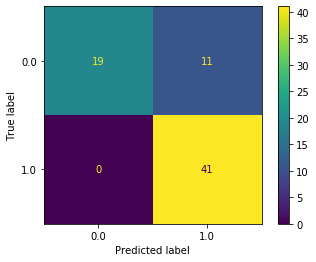


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.63      0.78        30
         1.0       0.79      1.00      0.88        41

    accuracy                           0.85        71
   macro avg       0.89      0.82      0.83        71
weighted avg       0.88      0.85      0.84        71



In [23]:
KNN(5, 2, 'distance')

Minkowski distance and 7 neighbors and uniform weight

Confusion Matrix:
[[19 11]
 [ 1 40]]


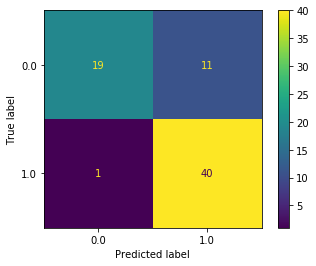


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.63      0.76        30
         1.0       0.78      0.98      0.87        41

    accuracy                           0.83        71
   macro avg       0.87      0.80      0.81        71
weighted avg       0.85      0.83      0.82        71



In [24]:
KNN(7, 3, 'uniform')

Manhattan distance and 7 neighbors and uniform weight

Confusion Matrix:
[[26  4]
 [ 1 40]]


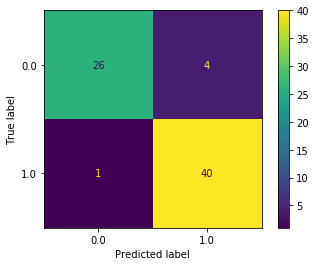


Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91        30
         1.0       0.91      0.98      0.94        41

    accuracy                           0.93        71
   macro avg       0.94      0.92      0.93        71
weighted avg       0.93      0.93      0.93        71



In [25]:
KNN(7, 1, 'uniform')

Manhattan distance and 7 neighbors and distance weight

Confusion Matrix:
[[26  4]
 [ 1 40]]


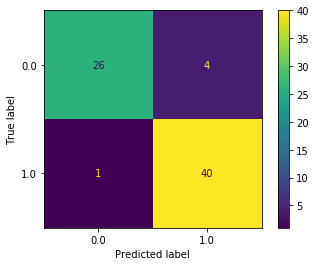


Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91        30
         1.0       0.91      0.98      0.94        41

    accuracy                           0.93        71
   macro avg       0.94      0.92      0.93        71
weighted avg       0.93      0.93      0.93        71



In [26]:
KNN(7, 1, 'distance')

Minkowski distance and 2 neighbors and uniform weight

Confusion Matrix:
[[26  4]
 [ 1 40]]


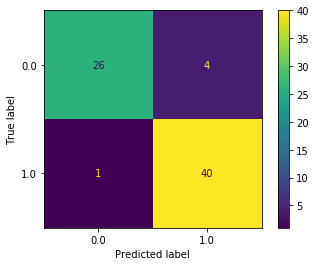


Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91        30
         1.0       0.91      0.98      0.94        41

    accuracy                           0.93        71
   macro avg       0.94      0.92      0.93        71
weighted avg       0.93      0.93      0.93        71



In [27]:
KNN(2, 3, 'uniform')

Minkowski distance and 8 neighbors and uniform weight

Confusion Matrix:
[[21  9]
 [ 1 40]]


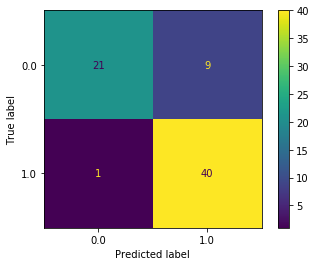


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81        30
         1.0       0.82      0.98      0.89        41

    accuracy                           0.86        71
   macro avg       0.89      0.84      0.85        71
weighted avg       0.87      0.86      0.85        71



In [28]:
KNN(8, 3, 'uniform')

Euclidean distance and 2 neighbors and uniform weight

Confusion Matrix:
[[26  4]
 [ 1 40]]


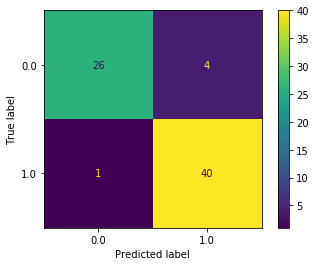


Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91        30
         1.0       0.91      0.98      0.94        41

    accuracy                           0.93        71
   macro avg       0.94      0.92      0.93        71
weighted avg       0.93      0.93      0.93        71



In [29]:
KNN(2, 2, 'uniform')

Euclidean distance and 2 neighbors and distance weight

Confusion Matrix:
[[23  7]
 [ 0 41]]


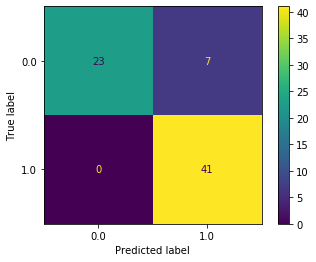


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        30
         1.0       0.85      1.00      0.92        41

    accuracy                           0.90        71
   macro avg       0.93      0.88      0.89        71
weighted avg       0.92      0.90      0.90        71



In [30]:
KNN(2, 2, 'distance')

With the different results obtained above, the top accuracy score was 93% and it was achieved using the following parameters: 

    neighbors -> 2, distance -> Minkowski, weights -> Uniform
    neighbors -> 2, distance -> Euclidean, weights -> Uniform    
    neighbors -> 5, distance -> Manhattan, weights -> By distance
    neighbors -> 7, distance -> Manhattan, weights -> Uniform
    neighbors -> 7, distance -> Manhattan, weights -> By distance
    
     